# Data set loading and analysis

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib 
%matplotlib inline
import os
print(os.listdir("/homes/cfh30/DataAnalytic/fifa19"))
#print(os.getcwd())


Using matplotlib backend: TkAgg
['data.csv', '.ipynb_checkpoints', 'bundesliga.csv', 'serie_a.csv', 'la_liga.csv', 'france_league_1_v2.csv', 'data_analytics_notepad.ipynb', 'premier_league.csv']


In [2]:
raw_df = pd.read_csv("/homes/cfh30/DataAnalytic/fifa19/data.csv")
raw_df.head(10)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


In [3]:
raw_df.info() #structure of the data frame, columns available for analysis
#need to choose columns as features for training

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [4]:
# Try to get some useful features and this featuref is not null
feature_columns    = ['Name',
                   'Age',
                   'Photo', 
                   'Nationality', 
                   'Flag',
                   'Overall',
                   'Potential', 
                   'Club', 
                   'Club Logo', 
                   'Value',
                   'Wage',
                   'Preferred Foot',
                   'International Reputation',
                   'Weak Foot',
                   'Skill Moves',
                   'Work Rate',
                   'Body Type',
                   'Position',
                   'Joined', 
                   'Contract Valid Until',
                   'Height',
                   'Weight',
                   'Crossing', 
                   'Finishing',
                   'HeadingAccuracy',
                   'ShortPassing', 
                   'Volleys', 
                   'Dribbling',
                   'Curve',
                   'FKAccuracy',
                   'LongPassing',
                   'BallControl',
                   'Acceleration',
                    'SprintSpeed',
                   'Agility',
                   'Reactions', 
                   'Balance',
                   'ShotPower', 
                   'Jumping',
                   'Stamina', 
                   'Strength',
                   'LongShots',
                   'Aggression',
                   'Interceptions',
                   'Positioning', 
                   'Vision', 
                   'Penalties',
                   'Composure',
                   'Marking',
                   'StandingTackle', 
                   'SlidingTackle',
                   'GKDiving',
                   'GKHandling',
                   'GKKicking',
                   'GKPositioning',
                   'GKReflexes',
                   'Release Clause']

In [5]:
sub_df = pd.DataFrame(raw_df, columns=feature_columns)

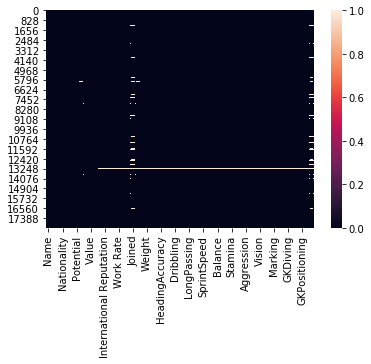

In [6]:
%matplotlib inline
sns.heatmap(data=sub_df.isnull() ) #to explore null data pointers
# it seems there is still a lot of null data, some of which are legitimate (i.e. Release clause should not be on each player)

Text(0.5, 1.0, 'Age distribution of all players in 2018/2019 season')

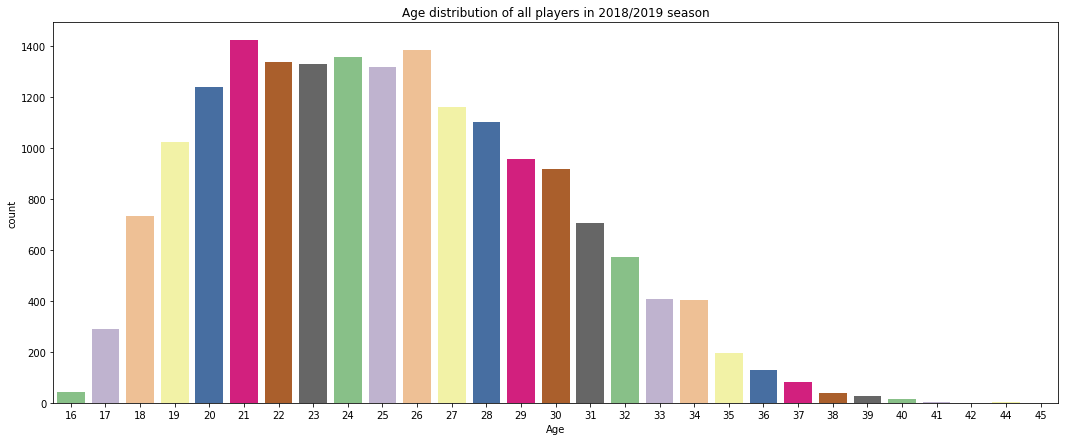

In [7]:
# find the age distribution of the whole data set
plt.figure(1, figsize=(18, 7))
sns.countplot( x= 'Age', data=sub_df, palette='Accent')
plt.title('Age distribution of all players in 2018/2019 season')
# the graph shows that most of the age is distributed form 19 ~ 30

# Analysis of "Average wage of different age groups in each of the top 5 leagues"


In [8]:
#dataset we got from keagle does not have information about a league 
#however we have info which club a player is playing in

#analysis is based on the top 5 leagues (most common concept in football)

def loadcsv(file):
    import csv
    with open(file, 'r') as f:
      reader = csv.reader(f)
      list_r = list(reader)
    return list_r[0]

#with open('data_analytics/fifa19/premier_league.csv', 'r') as f:
 # reader = csv.reader(f)
premierleague = loadcsv('/homes/cfh30/DataAnalytic/fifa19/premier_league.csv')
print(premierleague)

#load the rest of the 5 leagues' teams
bundesliga = loadcsv("/homes/cfh30/DataAnalytic/fifa19/bundesliga.csv") #load list of bundesliga teams
france_league = loadcsv("/homes/cfh30/DataAnalytic/fifa19/france_league_1_v2.csv") #load list of france_league_1 teams
la_liga = loadcsv("/homes/cfh30/DataAnalytic/fifa19/la_liga.csv") #load list of la_liga teams
serie_a = loadcsv("/homes/cfh30/DataAnalytic/fifa19/serie_a.csv") #load list of serie_a teams


['AFC Bournemouth', 'Arsenal', 'Brighton & Hove Albion', 'Burnley', 'Cardiff City', 'Chelsea', 'Crystal Palace', 'Everton', 'Fulham', 'Huddersfield Town', 'Leicester City', 'Liverpool', 'Manchester City', 'Manchester United', 'Newcastle United', 'Southampton', 'Tottenham Hotspur', 'Watford', 'West Ham United', 'Wolverhampton Wanderers', 'Championship – EFL', 'Aston Villa', 'Birmingham City', 'Blackburn Rovers', 'Bolton Wanderers', 'Brentford', 'Bristol City', 'Derby County', 'Hull City', 'Ipswich Town', 'Leeds United', 'Middlesbrough', 'Millwall', 'Norwich City', 'Nottingham Forest', 'Preston North End', 'Queens Park Rangers', 'Reading', 'Rotherham United', 'Sheffield United', 'Sheffield Wednesday', 'Stoke City', 'Swansea City', 'West Bromwich Albion', 'Wigan Athletic']


In [9]:
df_club_pl = sub_df.loc[sub_df['Club'].isin(premierleague) & sub_df['Age'] & sub_df['Wage']]
temp_df = pd.DataFrame(df_club_pl, columns=['Name', 'Age', 'Wage', 'Club'])
temp_df.head(10)

,Name,Age,Wage,Club
3,De Gea,27,€260K,Manchester United
4,K. De Bruyne,27,€355K,Manchester City
5,E. Hazard,27,€340K,Chelsea
14,N. Kanté,27,€225K,Chelsea
33,P. Aubameyang,29,€265K,Arsenal
37,H. Lloris,31,€150K,Tottenham Hotspur
45,P. Pogba,25,€210K,Manchester United
47,R. Lukaku,25,€230K,Manchester United
51,J. Vertonghen,31,€155K,Tottenham Hotspur
56,Bernardo Silva,23,€180K,Manchester City


In [10]:
def convert_wage (row): #function to remove eur symbol and last K elemt, i.e. converting to int
    if row['Wage'] == '€0':
        return 0
    if row['Wage'] != '':
        wage_int = int(row['Wage'][1:len(row['Wage'])-1])
        return wage_int

temp_df.apply(lambda row: convert_wage(row), axis=1) #verifying that calculated correctly
temp_df['Wage Int'] = temp_df.apply (lambda row: convert_wage(row), axis=1) #setting new column 'Wage Int' with calculated value
temp_df.head(10)

,Name,Age,Wage,Club,Wage Int
3,De Gea,27,€260K,Manchester United,260
4,K. De Bruyne,27,€355K,Manchester City,355
5,E. Hazard,27,€340K,Chelsea,340
14,N. Kanté,27,€225K,Chelsea,225
33,P. Aubameyang,29,€265K,Arsenal,265
37,H. Lloris,31,€150K,Tottenham Hotspur,150
45,P. Pogba,25,€210K,Manchester United,210
47,R. Lukaku,25,€230K,Manchester United,230
51,J. Vertonghen,31,€155K,Tottenham Hotspur,155
56,Bernardo Silva,23,€180K,Manchester City,180


In [11]:
#average salary per age 
groupped_df= temp_df.groupby('Age')['Wage Int'].mean()
groupped_df.head(10)

Age
17     4.634146
19     5.043478
21    19.544444
23    33.739130
25    44.294737
27    53.531915
29    47.373333
31    42.081633
33    30.911765
35    18.166667
Name: Wage Int, dtype: float64

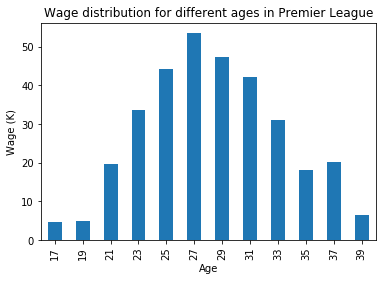

In [12]:
groupped_df.plot.bar(x='Age',y='Wage')
plt.ylabel('Wage (K)', fontdict=None, labelpad=None)
plt.title('Wage distribution for different ages in Premier League')
plt.show()
#Analysis shows that in Premier League the highest average pay is at the age of 27

# Analysis of the rest of the leagues

In [13]:
#now will create functions to reuse
def getSeriesToPlot(list_of_clubs):
    load_club_df = sub_df.loc[sub_df['Club'].isin(list_of_clubs) & sub_df['Age'] & sub_df['Wage']]
    load_club_df_sub = pd.DataFrame(load_club_df, columns=['Name', 'Age', 'Wage', 'Club'])
    load_club_df_sub.apply(lambda row: convert_wage(row), axis=1) #verifying that calculated correctly
    load_club_df_sub['Wage Int'] = load_club_df_sub.apply (lambda row: convert_wage(row), axis=1) #setting new column 'Wage Int' with calculated value
    #average salary per age 
    return load_club_df_sub.groupby('Age')['Wage Int'].mean()




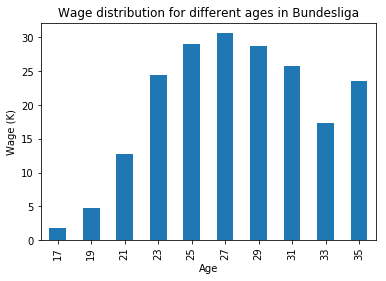

In [14]:
#Bundes league analysis
bundesliga_series = getSeriesToPlot(bundesliga)
bundesliga_series.plot.bar()
plt.ylabel('Wage (K)', fontdict=None, labelpad=None)
plt.title('Wage distribution for different ages in Bundesliga')
plt.show()
#Analysis shows that in Bundesliga  the highest average pay is at the age of 27 as well, with not that large gap between 25 and 29

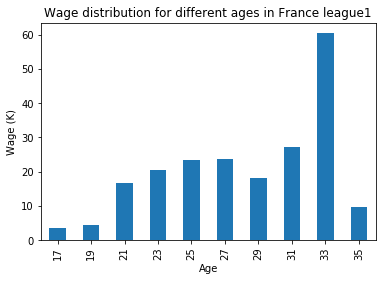

In [15]:


#France league 1 league analysis
france_league_series = getSeriesToPlot(france_league)
france_league_series.plot.bar()
plt.ylabel('Wage (K)', fontdict=None, labelpad=None)
plt.title('Wage distribution for different ages in France league1')
plt.show()
#Analysis shows that in France league 1 the highest average pay is at the age of 33,
#with much larger gap from other age groups

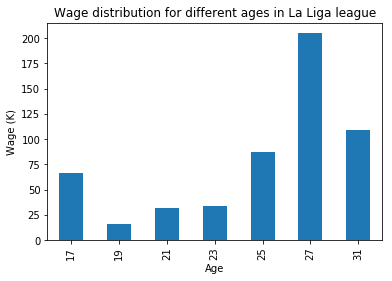

In [16]:
#la Liga league analysis
la_liga_series = getSeriesToPlot(la_liga)
la_liga_series.plot.bar()
plt.ylabel('Wage (K)', fontdict=None, labelpad=None)
plt.title('Wage distribution for different ages in La Liga league')
plt.show()
#Analysis shows that in La Liga the highest average pay is at the age of 27 as well,
#with much larger gap between 25 and 31

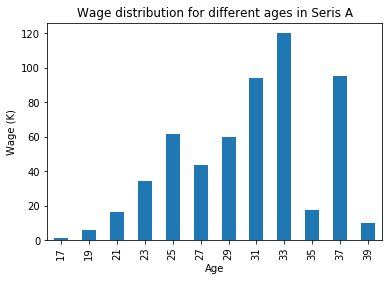

In [17]:
#Serie A league analysis
serie_a_series = getSeriesToPlot(serie_a)
serie_a_series.plot.bar()
plt.ylabel('Wage (K)', fontdict=None, labelpad=None)
plt.title('Wage distribution for different ages in Seris A')
plt.show()
#Analysis shows that in Serie A  the highest average pay is at the age of 33 
#which is very different to the other leagues, except Fance league 1


# Use Machine Learning to build a model for predicting the Wage for each player

In this part we try to do the machine learning of the players wage, it seems we can't include the player of the goalkeeper

In [18]:
# Include all the player except goalkeeper
vals = ['RF', 'ST', 'LW', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB']
ml_players= raw_df.loc[sub_df['Position'].isin(vals) & raw_df['Position']]

In [19]:
# choose all the columns we need
ml_cols =          ['Age',
                    'Potential',
                   'Crossing', 
                   'Finishing',
                   'HeadingAccuracy',
                   'ShortPassing', 
                   'Volleys', 
                   'Dribbling',
                   'Curve',
                   'FKAccuracy',
                   'LongPassing',
                   'BallControl',
                   'Acceleration',
                    'SprintSpeed',
                   'Agility',
                   'Reactions', 
                   'Balance',
                   'ShotPower', 
                   'Jumping',
                   'Stamina', 
                   'Strength',
                   'LongShots',
                   'Aggression',
                   'Interceptions',
                   'Positioning', 
                   'Vision', 
                   'Penalties',
                   'Composure',
                   'Marking',
                   'StandingTackle', 
                   'SlidingTackle',
                    'Overall',
                    'Wage'
                   ]

In [20]:
ml_df = pd.DataFrame(data=ml_players, columns=ml_cols)

In [21]:
#Convert the Wage from object to integer and delete the original Wage column
ml_df['WageInt']=0
ml_df.apply(lambda row: convert_wage(row), axis=1) #verifying that calculated correctly
ml_df['WageInt']=ml_df.apply(lambda row: convert_wage(row), axis=1)
ml_df=ml_df.drop("Wage", axis=1) #delete the original wage column which type is object

In [22]:
ml_df.head(10)

,Age,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,...,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Overall,WageInt
0,31,94,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,...,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,94,565
1,33,94,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,...,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,94,405
2,26,93,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,...,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,92,290
4,27,92,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,...,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,91,355
5,27,91,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,...,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,91,340
6,32,91,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,...,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,91,420
7,31,91,77.0,93.0,77.0,82.0,88.0,87.0,86.0,84.0,...,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0,91,455
8,32,91,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,...,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,91,380
10,29,90,62.0,91.0,85.0,83.0,89.0,85.0,77.0,86.0,...,39.0,91.0,77.0,88.0,86.0,34.0,42.0,19.0,90,205
11,28,90,88.0,76.0,54.0,92.0,82.0,81.0,86.0,84.0,...,82.0,79.0,86.0,73.0,85.0,72.0,79.0,69.0,90,355


In [23]:
# check the data
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16122 entries, 0 to 18206
Data columns (total 33 columns):
Age                16122 non-null int64
Potential          16122 non-null int64
Crossing           16122 non-null float64
Finishing          16122 non-null float64
HeadingAccuracy    16122 non-null float64
ShortPassing       16122 non-null float64
Volleys            16122 non-null float64
Dribbling          16122 non-null float64
Curve              16122 non-null float64
FKAccuracy         16122 non-null float64
LongPassing        16122 non-null float64
BallControl        16122 non-null float64
Acceleration       16122 non-null float64
SprintSpeed        16122 non-null float64
Agility            16122 non-null float64
Reactions          16122 non-null float64
Balance            16122 non-null float64
ShotPower          16122 non-null float64
Jumping            16122 non-null float64
Stamina            16122 non-null float64
Strength           16122 non-null float64
LongShots    

In [24]:
ml_df.isnull().any()

Age                False
Potential          False
Crossing           False
Finishing          False
HeadingAccuracy    False
ShortPassing       False
Volleys            False
Dribbling          False
Curve              False
FKAccuracy         False
LongPassing        False
BallControl        False
Acceleration       False
SprintSpeed        False
Agility            False
Reactions          False
Balance            False
ShotPower          False
Jumping            False
Stamina            False
Strength           False
LongShots          False
Aggression         False
Interceptions      False
Positioning        False
Vision             False
Penalties          False
Composure          False
Marking            False
StandingTackle     False
SlidingTackle      False
Overall            False
WageInt            False
dtype: bool

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [26]:
# Train test split
y = ml_df['WageInt']
X = ml_df[['Age',
           'Potential',
           'Crossing', 
           'Finishing',
           'HeadingAccuracy',
           'ShortPassing', 
           'Volleys', 
           'Dribbling',
           'Curve',
           'FKAccuracy',
           'LongPassing',
           'BallControl',
           'Acceleration',
            'SprintSpeed',
           'Agility',
           'Reactions', 
           'Balance',
           'ShotPower', 
           'Jumping',
           'Stamina', 
           'Strength',
           'LongShots',
           'Aggression',
           'Interceptions',
           'Positioning', 
           'Vision', 
           'Penalties',
           'Composure',
           'Marking',
           'StandingTackle', 
           'SlidingTackle',
           'Overall']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

In [27]:
lm = LinearRegression()

In [28]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
print('Coefficients:', lm.coef_)

Coefficients: [-0.46551325  0.39782944  0.01974176 -0.00853162  0.02287316 -0.11225193
  0.12757113  0.04973512  0.02247006 -0.03018849 -0.03863876 -0.15993474
 -0.0471153   0.0023009  -0.08141566  0.20619309  0.09008126 -0.05465278
  0.01678251 -0.10026903 -0.02589182 -0.06137696 -0.02007119 -0.01567736
  0.04311087  0.11870527  0.04890577  0.00592073  0.01609289 -0.01204404
  0.06412956  1.73950476]


In [30]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted y')

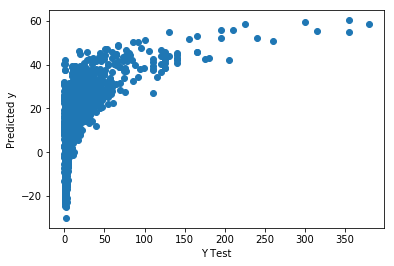

In [31]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted y')

We define the accuracy of predictions, if the error range is less than 20%, we take the prediction is correct.
Then we calculate the total accuracy of our model

In [32]:
def accuracy(y_test,predictions):
    difference=(y_test-predictions)/y_test*100
    n=0
    total=0
    for i in difference:
        if ((i<20)&(i>0))or((i>-20)&(i<0)):
            n=n+1
        total=total+1
    print("Accuracy %:",n/total*100,"%")
accuracy(y_test,predictions)

Accuracy %: 10.69767441860465 %


The model is very inaccurate, the prediction should not give any negative value.

# Try to use value instead wage for analysis

In [33]:
# Include all the player except goalkeeper
vals = ['RF', 'ST', 'LW', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB']
ml_players= raw_df.loc[sub_df['Position'].isin(vals) & raw_df['Position']]

In [34]:
# choose all the columns we need
ml_cols =          ['Age',
                    'Potential',
                   'Crossing', 
                   'Finishing',
                   'HeadingAccuracy',
                   'ShortPassing', 
                   'Volleys', 
                   'Dribbling',
                   'Curve',
                   'FKAccuracy',
                   'LongPassing',
                   'BallControl',
                   'Acceleration',
                    'SprintSpeed',
                   'Agility',
                   'Reactions', 
                   'Balance',
                   'ShotPower', 
                   'Jumping',
                   'Stamina', 
                   'Strength',
                   'LongShots',
                   'Aggression',
                   'Interceptions',
                   'Positioning', 
                   'Vision', 
                   'Penalties',
                   'Composure',
                   'Marking',
                   'StandingTackle', 
                   'SlidingTackle',
                    'Overall',
                    'Value',
                    'Wage',
                    'Release Clause'
                   ]

In [35]:
ml_df = pd.DataFrame(data=ml_players, columns=ml_cols)

In [36]:
# K=1.000 and M=1.000.000  
def convert_value(row):
    if row['Value'] == '€0':
        return 0
    if row['Value'] != '':
        if 'K' in row['Value']:
            Value_float = float(row['Value'][1:len(row['Value'])-1])
        else:
            Value_float = float(row['Value'][1:len(row['Value'])-1])*1000
        return Value_float
    

In [37]:
ml_df.apply(lambda row: convert_value(row), axis=1)
ml_df['Value_float'] = ml_df.apply (lambda row: convert_value(row), axis=1) #setting new column 'Value_float' with calculated value
ml_df.head(10)

,Age,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Overall,Value,Wage,Release Clause,Value_float
0,31,94,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,...,75.0,96.0,33.0,28.0,26.0,94,€110.5M,€565K,€226.5M,110500.0
1,33,94,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,...,85.0,95.0,28.0,31.0,23.0,94,€77M,€405K,€127.1M,77000.0
2,26,93,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,...,81.0,94.0,27.0,24.0,33.0,92,€118.5M,€290K,€228.1M,118500.0
4,27,92,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,...,79.0,88.0,68.0,58.0,51.0,91,€102M,€355K,€196.4M,102000.0
5,27,91,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,...,86.0,91.0,34.0,27.0,22.0,91,€93M,€340K,€172.1M,93000.0
6,32,91,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,...,82.0,84.0,60.0,76.0,73.0,91,€67M,€420K,€137.4M,67000.0
7,31,91,77.0,93.0,77.0,82.0,88.0,87.0,86.0,84.0,...,85.0,85.0,62.0,45.0,38.0,91,€80M,€455K,€164M,80000.0
8,32,91,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,...,75.0,82.0,87.0,92.0,91.0,91,€51M,€380K,€104.6M,51000.0
10,29,90,62.0,91.0,85.0,83.0,89.0,85.0,77.0,86.0,...,88.0,86.0,34.0,42.0,19.0,90,€77M,€205K,€127.1M,77000.0
11,28,90,88.0,76.0,54.0,92.0,82.0,81.0,86.0,84.0,...,73.0,85.0,72.0,79.0,69.0,90,€76.5M,€355K,€156.8M,76500.0


In [38]:
ml_df['Age'] = ml_df['Age'].astype(float)
ml_df['Potential'] = ml_df['Potential'].astype(float)
ml_df['Overall'] = ml_df['Overall'].astype(float)

In [39]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16122 entries, 0 to 18206
Data columns (total 36 columns):
Age                16122 non-null float64
Potential          16122 non-null float64
Crossing           16122 non-null float64
Finishing          16122 non-null float64
HeadingAccuracy    16122 non-null float64
ShortPassing       16122 non-null float64
Volleys            16122 non-null float64
Dribbling          16122 non-null float64
Curve              16122 non-null float64
FKAccuracy         16122 non-null float64
LongPassing        16122 non-null float64
BallControl        16122 non-null float64
Acceleration       16122 non-null float64
SprintSpeed        16122 non-null float64
Agility            16122 non-null float64
Reactions          16122 non-null float64
Balance            16122 non-null float64
ShotPower          16122 non-null float64
Jumping            16122 non-null float64
Stamina            16122 non-null float64
Strength           16122 non-null float64
LongShots

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [41]:
y = ml_df['Value_float']
X = ml_df[['Age',
           'Potential',
           'Crossing', 
           'Finishing',
           'HeadingAccuracy',
           'ShortPassing', 
           'Volleys', 
           'Dribbling',
           'Curve',
           'FKAccuracy',
           'LongPassing',
           'BallControl',
           'Acceleration',
            'SprintSpeed',
           'Agility',
           'Reactions', 
           'Balance',
           'ShotPower', 
           'Jumping',
           'Stamina', 
           'Strength',
           'LongShots',
           'Aggression',
           'Interceptions',
           'Positioning', 
           'Vision', 
           'Penalties',
           'Composure',
           'Marking',
           'StandingTackle', 
           'SlidingTackle',
           'Overall']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

In [42]:
lm = LinearRegression()

In [43]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Text(0, 0.5, 'Predicted y')

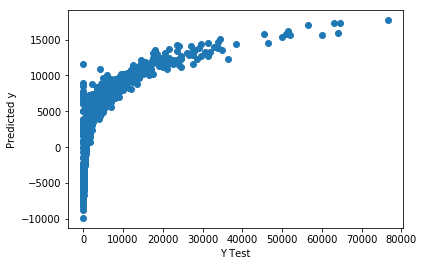

In [44]:
predictions = lm.predict(X_test)

plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted y')

In [45]:
from sklearn import metrics
print("MAE", metrics.mean_absolute_error(y_test, predictions))
print("MSE", metrics.mean_squared_error(y_test, predictions))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE 2191.4437236310127
MSE 14795577.72292934
RMSE 3846.5020112992715


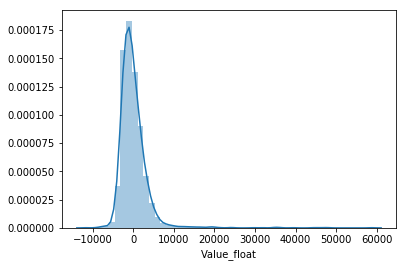

In [46]:
sns.distplot((y_test - predictions), bins=50)

In [47]:
accuracy(y_test,predictions)

Accuracy %: 11.007751937984496 %


The model is still very bias, so we look back into our dataset and we found that there is a huge gap between 
good players and bad players.

In [48]:
#Data Cleaning!
#Because the difference of Value between the top players and the lower players is too huge
#So we remove the lower value players data
#remove the amount of Value lower than 10M
ml_df=ml_df[ml_df['Value_float']>=10000]
ml_df.tail(10)

,Age,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Overall,Value,Wage,Release Clause,Value_float
1913,22.0,84.0,59.0,62.0,75.0,78.0,58.0,76.0,68.0,69.0,...,58.0,68.0,58.0,74.0,65.0,75.0,€10M,€22K,€23M,10000.0
1946,21.0,83.0,49.0,77.0,60.0,67.0,73.0,77.0,69.0,64.0,...,73.0,71.0,28.0,25.0,23.0,75.0,€10M,€45K,€21M,10000.0
1955,20.0,84.0,77.0,67.0,58.0,77.0,70.0,79.0,69.0,52.0,...,65.0,68.0,27.0,62.0,60.0,75.0,€10.5M,€16K,€23.1M,10500.0
1958,21.0,85.0,59.0,59.0,54.0,77.0,61.0,77.0,66.0,41.0,...,49.0,74.0,64.0,59.0,64.0,75.0,€10.5M,€19K,€20M,10500.0
1968,22.0,85.0,72.0,61.0,40.0,66.0,52.0,89.0,65.0,42.0,...,47.0,70.0,16.0,26.0,23.0,75.0,€10.5M,€54K,€22.1M,10500.0
1972,20.0,84.0,69.0,68.0,51.0,75.0,66.0,83.0,62.0,58.0,...,66.0,66.0,54.0,55.0,37.0,75.0,€10.5M,€1K,€25.2M,10500.0
1975,21.0,85.0,72.0,66.0,39.0,73.0,52.0,82.0,69.0,59.0,...,55.0,66.0,24.0,20.0,22.0,75.0,€11M,€64K,NaN,11000.0
2012,20.0,87.0,70.0,65.0,57.0,68.0,65.0,81.0,76.0,57.0,...,63.0,80.0,37.0,35.0,28.0,75.0,€12M,€9K,€26.4M,12000.0
2048,21.0,84.0,74.0,72.0,44.0,68.0,55.0,79.0,70.0,57.0,...,44.0,73.0,35.0,52.0,47.0,75.0,€10.5M,€16K,€17.9M,10500.0
2468,20.0,85.0,47.0,76.0,75.0,64.0,54.0,68.0,50.0,42.0,...,72.0,70.0,35.0,22.0,15.0,74.0,€10M,€59K,NaN,10000.0


In [49]:
y = ml_df['Value_float']
X = ml_df[['Age',
           'Potential',
           'Crossing', 
           'Finishing',
           'HeadingAccuracy',
           'ShortPassing', 
           'Volleys', 
           'Dribbling',
           'Curve',
           'FKAccuracy',
           'LongPassing',
           'BallControl',
           'Acceleration',
            'SprintSpeed',
           'Agility',
           'Reactions', 
           'Balance',
           'ShotPower', 
           'Jumping',
           'Stamina', 
           'Strength',
           'LongShots',
           'Aggression',
           'Interceptions',
           'Positioning', 
           'Vision', 
           'Penalties',
           'Composure',
           'Marking',
           'StandingTackle', 
           'SlidingTackle',
           'Overall']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

In [50]:
lm = LinearRegression()

In [51]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Text(0, 0.5, 'Predicted y')

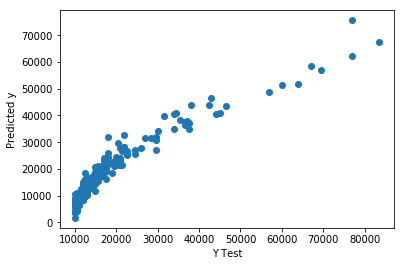

In [52]:
predictions = lm.predict(X_test)

plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted y')

In [53]:
print('Coefficients:', lm.coef_)

Coefficients: [-1486.42580225   195.70209402   -39.19888459    71.23669111
    40.53790901   -96.92510174   -22.94597591   -40.80234801
   -29.97745508    30.84121705    96.72019759    31.7210594
    53.57579888   -64.89706386   -18.40234227   -52.06591066
    66.02788172   -88.50464534   -31.21399372    80.39141521
    36.80940665    47.0650644    -27.15183793   -39.34296485
    28.50470735   -28.01897733    17.26081523    65.70213659
   -45.0744407    -27.32283958    12.61499036  4267.02460005]


In [54]:
print("MAE", metrics.mean_absolute_error(y_test, predictions))
print("MSE", metrics.mean_squared_error(y_test, predictions))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE 3202.178119139349
MSE 18005136.360056717
RMSE 4243.245969780295


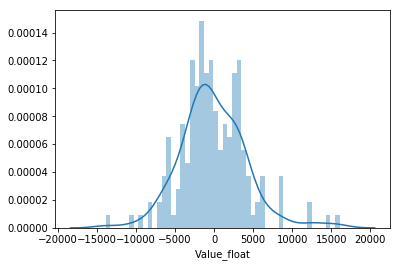

In [55]:
sns.distplot((y_test - predictions), bins=50)

In [56]:
# Get the effect of every parameter
coeffecients = pd.DataFrame(lm.coef_, X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Age,-1486.425802
Potential,195.702094
Crossing,-39.198885
Finishing,71.236691
HeadingAccuracy,40.537909
ShortPassing,-96.925102
Volleys,-22.945976
Dribbling,-40.802348
Curve,-29.977455
FKAccuracy,30.841217


As expected, Age and Overall plays the most important role in salary expectation. The next important factor is potential.

In [57]:
accuracy(y_test,predictions)

Accuracy %: 63.888888888888886 %


The accuracy is higher than previous models, so that we try to raise the minimum value edge again to find out.

In [58]:
#We raise the minimum value to 20000!
ml_df=ml_df[ml_df['Value_float']>=20000]
ml_df.tail(10)

,Age,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Overall,Value,Wage,Release Clause,Value_float
415,20.0,90.0,68.0,72.0,54.0,84.0,68.0,84.0,78.0,59.0,...,63.0,82.0,64.0,64.0,63.0,80.0,€23.5M,€51K,€49.4M,23500.0
416,21.0,87.0,80.0,74.0,56.0,84.0,66.0,79.0,69.0,82.0,...,73.0,76.0,60.0,65.0,56.0,80.0,€21M,€31K,€48.3M,21000.0
421,21.0,87.0,81.0,78.0,44.0,80.0,64.0,84.0,69.0,71.0,...,52.0,69.0,50.0,32.0,30.0,80.0,€21M,€29K,€48.3M,21000.0
427,22.0,86.0,75.0,73.0,59.0,81.0,69.0,81.0,82.0,72.0,...,60.0,79.0,61.0,67.0,67.0,80.0,€20M,€72K,NaN,20000.0
429,21.0,87.0,75.0,61.0,51.0,84.0,74.0,73.0,79.0,83.0,...,62.0,83.0,69.0,74.0,69.0,80.0,€20.5M,€59K,€43.1M,20500.0
430,24.0,85.0,50.0,81.0,82.0,69.0,70.0,75.0,76.0,76.0,...,75.0,68.0,41.0,40.0,34.0,80.0,€20M,€140K,€42.5M,20000.0
435,22.0,86.0,67.0,60.0,43.0,83.0,59.0,85.0,68.0,53.0,...,55.0,60.0,72.0,64.0,59.0,80.0,€20M,€50K,€38M,20000.0
437,23.0,85.0,75.0,78.0,58.0,76.0,68.0,83.0,70.0,52.0,...,60.0,79.0,17.0,29.0,28.0,80.0,€20M,€65K,NaN,20000.0
440,22.0,85.0,78.0,79.0,38.0,79.0,56.0,82.0,76.0,74.0,...,65.0,74.0,30.0,28.0,27.0,80.0,€20M,€65K,€39.5M,20000.0
441,22.0,85.0,73.0,82.0,76.0,69.0,70.0,81.0,69.0,55.0,...,67.0,69.0,48.0,46.0,49.0,80.0,€20M,€40K,€43.5M,20000.0


In [59]:
y = ml_df['Value_float']
X = ml_df[['Age',
           'Potential',
           'Crossing', 
           'Finishing',
           'HeadingAccuracy',
           'ShortPassing', 
           'Volleys', 
           'Dribbling',
           'Curve',
           'FKAccuracy',
           'LongPassing',
           'BallControl',
           'Acceleration',
            'SprintSpeed',
           'Agility',
           'Reactions', 
           'Balance',
           'ShotPower', 
           'Jumping',
           'Stamina', 
           'Strength',
           'LongShots',
           'Aggression',
           'Interceptions',
           'Positioning', 
           'Vision', 
           'Penalties',
           'Composure',
           'Marking',
           'StandingTackle', 
           'SlidingTackle',
           'Overall']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

In [60]:
lm = LinearRegression()

In [61]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Text(0, 0.5, 'Predicted y')

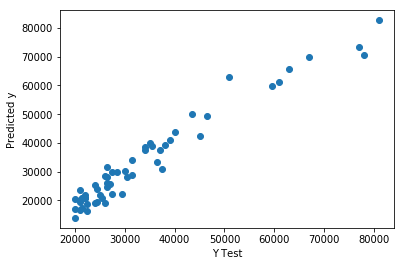

In [62]:
predictions = lm.predict(X_test)

plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted y')

In [63]:
print('Coefficients:', lm.coef_)

Coefficients: [-2.39512461e+03 -2.23744551e+02 -7.30554598e+01  3.69362506e+01
  1.55297451e+01 -3.28719483e+01  5.27107443e+01  5.07022938e+01
 -3.22662984e+01  1.85162264e+00  7.49678820e+01  1.36975116e+02
 -8.54479521e+00 -1.51009863e+01 -8.37262282e+01  4.85050424e+01
  6.64341796e+01 -2.78194646e+01 -6.21684382e+01  6.45430964e+01
 -4.52893793e+01  8.96071492e+00  5.82541861e+01 -5.42424462e+01
 -2.82331361e+01  4.78407300e+01  7.16556713e+00 -8.63240788e-01
 -3.78859617e+01 -9.49454142e+01  4.91834431e+01  6.77423035e+03]


In [64]:
print("MAE", metrics.mean_absolute_error(y_test, predictions))
print("MSE", metrics.mean_squared_error(y_test, predictions))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE 3089.112924751852
MSE 14961812.439152455
RMSE 3868.0502115604


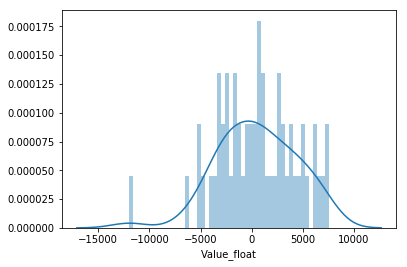

In [65]:
sns.distplot((y_test - predictions), bins=50)

In [66]:
# Get the effect of every parameter
coeffecients = pd.DataFrame(lm.coef_, X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Age,-2395.124610
Potential,-223.744551
Crossing,-73.055460
Finishing,36.936251
HeadingAccuracy,15.529745
ShortPassing,-32.871948
Volleys,52.710744
Dribbling,50.702294
Curve,-32.266298
FKAccuracy,1.851623


In [67]:
accuracy(y_test,predictions)

Accuracy %: 85.96491228070175 %


The accuracy is 85.96%, it looks better than the previous models!